In [254]:
import networkx as nx
import numpy as np
import collections
import matplotlib.pyplot as plt
import csv
import math

In [2]:
roi_data = nx.read_edgelist('data/traced-roi-nohead.csv', delimiter=',', create_using=nx.DiGraph, nodetype=int, data=(('roi',str),('weight',int)))

In [14]:
# Load instance and type foreach neuron
ntypes = collections.defaultdict(list)

with open('data/traced-neurons.csv') as nfile:
    reader = csv.reader(nfile)
    instance = {}
    neuron_type = {}
    head = None
    for rows in reader:
        if not head:
            head = rows
            continue
        
        instance[int(rows[0])] = rows[1]
        neuron_type[int(rows[0])] = rows[2]
        
        ntypes[rows[2]].append(int(rows[0]))
            

# Set as attributes in the network
nx.set_node_attributes(roi_data, instance, name="instance")
nx.set_node_attributes(roi_data, neuron_type, name="type")

types_map = []
for ntype in ntypes.keys():
    types_map.append((ntype, ntypes[ntype]))
types_map.sort(key=lambda x: len(x[1]), reverse=True)

# ignore untyped nodes
types_map = types_map[1:]

In [207]:
celegans = nx.read_edgelist('data/herm-nohead.csv', delimiter=' , ', create_using=nx.DiGraph)
print(nx.average_clustering(celegans))
celegans_triads = nx.triadic_census(celegans)
in_deg_seq = [d for n, d in celegans.in_degree()]
out_deg_seq = [d for n, d in celegans.out_degree()]

random_celegans = []
C_random_triads = []
for i in range(3):
    random_celegans.append(nx.directed_configuration_model(in_deg_seq, out_deg_seq, create_using=nx.DiGraph))
    C_random_triads.append(nx.triadic_census(random_celegans[i]))
    


0.26601450229968926


In [208]:
celegans.has_edge('I2R', 'I1R')

True

In [302]:

print(len(celegans.nodes()))
print(len(celegans.edges()))
sumer=0
for i in range(3):
    print(C_random_triads[i]['030T'])
    sumer += C_random_triads[i]['030T']
print("\n")
print(celegans_triads['030T'])

print(celegans_triads['030T']*3/sumer)


450
6625
6390
6098
6529


1854
0.29247515380974914


In [79]:
print(nx.average_clustering(roi_data))

0.23776727048739857


In [75]:
subgraphs = []

for i in range(10):
    
    # Create a subgraph SG based on roi_data
    SG = roi_data.__class__()
    SG.add_nodes_from((n, roi_data.nodes[n]) for n in types_map[i][1])
    SG.add_edges_from((n, nbr, d)
        for n, nbrs in roi_data.adj.items() if n in types_map[i][1]
        for nbr, d in nbrs.items() if nbr in types_map[i][1])
    SG.graph.update(roi_data.graph)
    subgraphs.append((types_map[i][0], SG))

In [76]:
for i in range(10):
    print(f"Neuron type: {subgraphs[i][0]}. Neuron count: {len(subgraphs[i][1].nodes())}. Edge Count: {len(subgraphs[i][1].edges())}")

Neuron type: KCab-sc. Neuron count: 828. Edge Count: 137006
Neuron type: KCg. Neuron count: 701. Edge Count: 145775
Neuron type: LC10. Neuron count: 448. Edge Count: 14449
Neuron type: MC61. Neuron count: 346. Edge Count: 4864
Neuron type: KCa'b'. Neuron count: 336. Edge Count: 37542
Neuron type: LC12. Neuron count: 226. Edge Count: 15416
Neuron type: LC17. Neuron count: 186. Edge Count: 18729
Neuron type: olfactory LN. Neuron count: 175. Edge Count: 11969
Neuron type: LC9. Neuron count: 135. Edge Count: 4512
Neuron type: MC64. Neuron count: 121. Edge Count: 854


In [78]:
# Clustering coefficient estimation
for i in range(10):
    print(f"Neuron type: {subgraphs[i][0]}. Avg clustering coefficient: {nx.average_clustering(subgraphs[i][1])}")

Neuron type: KCab-sc. Avg clustering coefficient: 0.39866960651594974
Neuron type: KCg. Avg clustering coefficient: 0.3747609557568788
Neuron type: LC10. Avg clustering coefficient: 0.32697294299167406
Neuron type: MC61. Avg clustering coefficient: 0.3353495371942025
Neuron type: KCa'b'. Avg clustering coefficient: 0.6255333088977165
Neuron type: LC12. Avg clustering coefficient: 0.31838586982440065
Neuron type: LC17. Avg clustering coefficient: 0.554690786954756
Neuron type: olfactory LN. Avg clustering coefficient: 0.6736822522892568
Neuron type: LC9. Avg clustering coefficient: 0.4949327579662873
Neuron type: MC64. Avg clustering coefficient: 0.19460154203645583


In [36]:
triadics = {}
for i in range(5):
    triadics[subgraphs[i][0]] = nx.triadic_census(subgraphs[i][1])


In [58]:
random_sets = []

for j in range(5):
    random_triadics = {}
    random_graphs = {}
    print(f"Run {j}")
    for i, key in enumerate(triadics.keys()):
        print("Processing graph {}".format(i+1))
        print("Generating random graph...")
        in_deg_seq = [d for n, d in subgraphs[i][1].in_degree()]
        out_deg_seq = [d for n, d in subgraphs[i][1].out_degree()]

        random_graphs[key] = nx.directed_configuration_model(in_deg_seq, out_deg_seq, create_using=nx.DiGraph)
        print("Finding triadics...")
        random_triadics[key] = nx.triadic_census(random_graphs[key])
    random_sets.append((random_triadics, random_graphs))

Run 0
Processing graph 1
Generating random graph...
Finding triadics...
Processing graph 2
Generating random graph...
Finding triadics...
Processing graph 3
Generating random graph...
Finding triadics...
Processing graph 4
Generating random graph...
Finding triadics...
Processing graph 5
Generating random graph...
Finding triadics...
Run 1
Processing graph 1
Generating random graph...
Finding triadics...
Processing graph 2
Generating random graph...
Finding triadics...
Processing graph 3
Generating random graph...
Finding triadics...
Processing graph 4
Generating random graph...
Finding triadics...
Processing graph 5
Generating random graph...
Finding triadics...
Run 2
Processing graph 1
Generating random graph...
Finding triadics...
Processing graph 2
Generating random graph...
Finding triadics...
Processing graph 3
Generating random graph...
Finding triadics...
Processing graph 4
Generating random graph...
Finding triadics...
Processing graph 5
Generating random graph...
Finding tria

In [39]:
triadics.keys()
triadics

{'KCab-sc': {'003': 37622693,
  '012': 18930406,
  '102': 24382162,
  '021D': 599820,
  '021U': 606813,
  '021C': 1197662,
  '111D': 2678936,
  '111U': 2674640,
  '030T': 160229,
  '030C': 51753,
  '201': 2646252,
  '120D': 216068,
  '120U': 217689,
  '120C': 423914,
  '210': 1202964,
  '300': 656075},
 'KCg': {'003': 13186468,
  '012': 11726911,
  '102': 13672967,
  '021D': 840580,
  '021U': 860750,
  '021C': 1681460,
  '111D': 3631030,
  '111U': 3631147,
  '030T': 324307,
  '030C': 105013,
  '201': 3801137,
  '120D': 355700,
  '120U': 362685,
  '120C': 702510,
  '210': 1607629,
  '300': 676256},
 'LC10': {'003': 10655660,
  '012': 2426371,
  '102': 1375458,
  '021D': 43087,
  '021U': 40743,
  '021C': 70541,
  '111D': 76711,
  '111U': 82420,
  '030T': 13418,
  '030C': 2347,
  '201': 36874,
  '120D': 9710,
  '120U': 9932,
  '120C': 12157,
  '210': 22757,
  '300': 7510},
 'MC61': {'003': 5731965,
  '012': 609458,
  '102': 445850,
  '021D': 4637,
  '021U': 4937,
  '021C': 8924,
  '111D':

In [73]:
from statistics import stdev,mean
meanres = collections.defaultdict(dict)
stdres = collections.defaultdict(dict)
for key in random_sets[0][0].keys():
    for motif in random_sets[0][0][key].keys():
        vals = [random_sets[i][0][key][motif] for i in range(5)]
        meanres[key][motif] = mean(vals)
        stdres[key][motif] = stdev(vals)
        print(vals)
        

[28951149, 28992072, 29054424, 28975803, 28940452]
[37250337, 37249705, 37190775, 37271581, 37286989]
[4222388, 4220945, 4272050, 4204152, 4179232]
[4088454, 4080540, 4061076, 4085294, 4097947]
[4091671, 4084244, 4067971, 4089358, 4103262]
[8211181, 8197618, 8161444, 8210781, 8234790]
[1896008, 1891684, 1906079, 1887723, 1877525]
[1889086, 1889215, 1905465, 1884968, 1877157]
[1845571, 1842337, 1826222, 1841207, 1856422]
[621254, 617262, 613837, 618023, 623971]
[221941, 222325, 225997, 221363, 218067]
[216809, 217188, 217928, 216628, 216293]
[217716, 216441, 217727, 216542, 215686]
[436326, 437940, 436937, 436599, 434005]
[103992, 104269, 105800, 103762, 102122]
[4193, 4291, 4344, 4292, 4156]
[10293689, 10356411, 10333475, 10339072, 10348449]
[19726475, 19706486, 19722923, 19710340, 19721023]
[3470602, 3505904, 3495009, 3491627, 3486179]
[3288103, 3271284, 3279534, 3278011, 3281619]
[3303986, 3283465, 3287016, 3288749, 3292458]
[6612323, 6571100, 6587199, 6581784, 6586385]
[2406536, 241

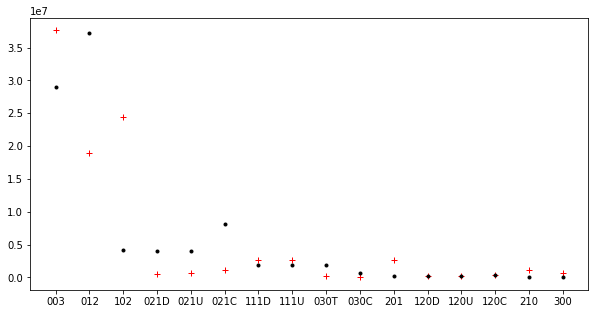

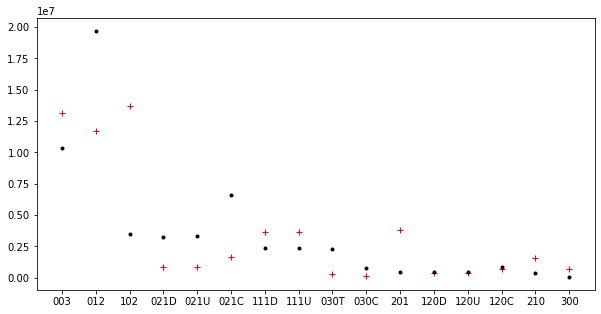

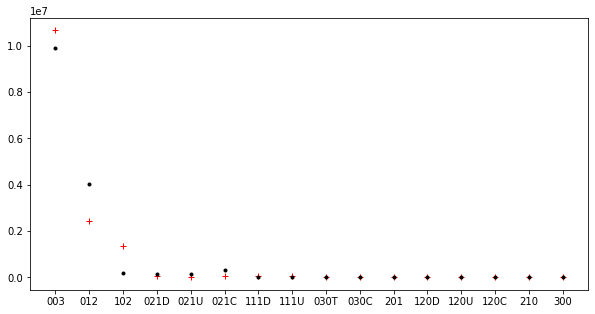

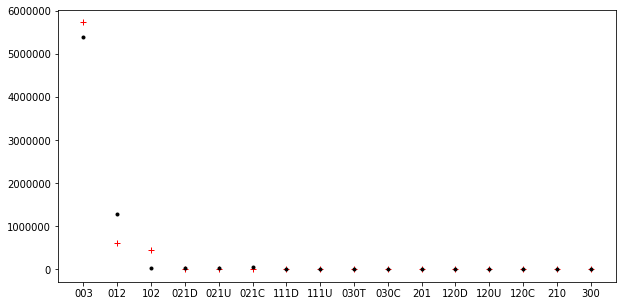

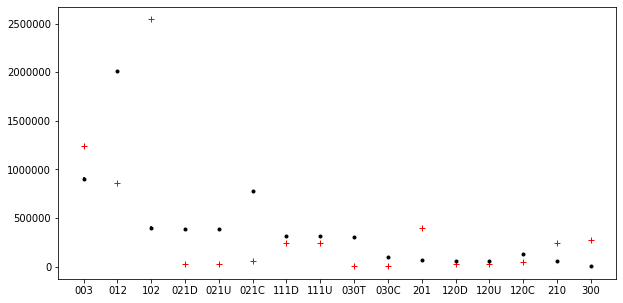

In [74]:
for key in meanres.keys():
    plt.figure(figsize=(10,5))
    plt.errorbar(meanres[key].keys(), meanres[key].values(), yerr=[err*3 for err in stdres[key].values()], fmt='.k')
    plt.plot(list(triadics[key].keys()), list(triadics[key].values()), 'r+')
    plt.show()

In [ ]:
for 

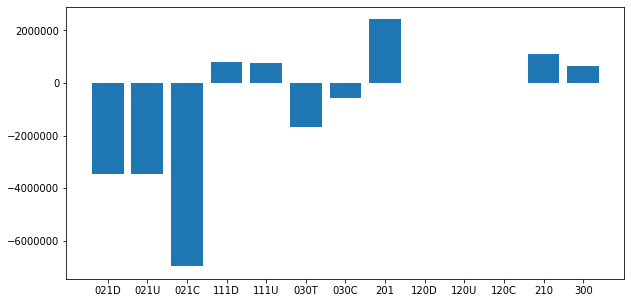

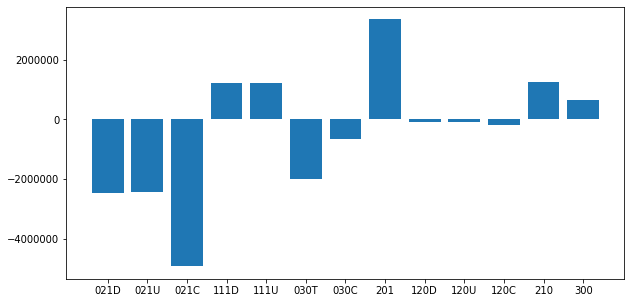

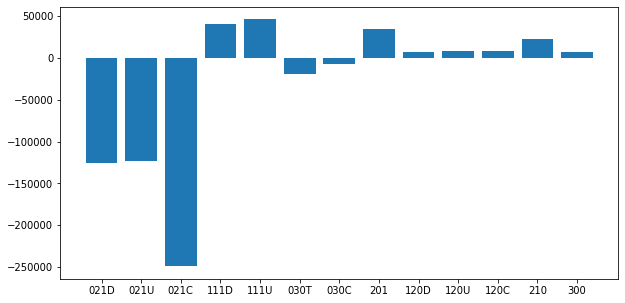

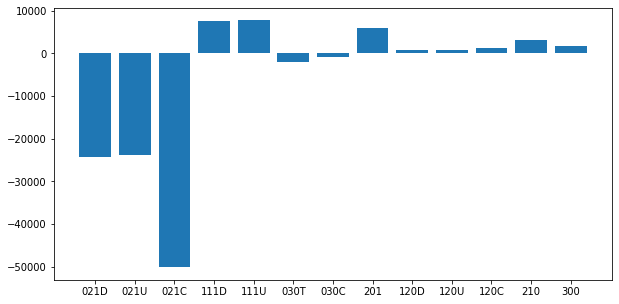

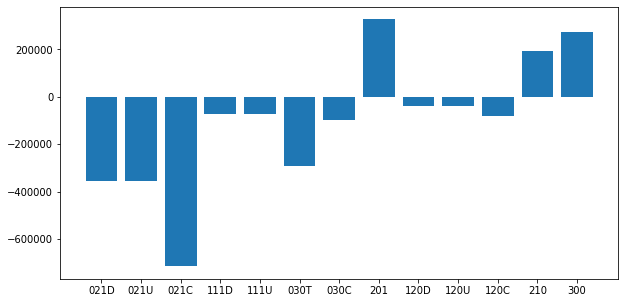

In [56]:
diffs = collections.defaultdict(dict)

for key in triadics:
    for motif in triadics[key].keys():
        diffs[key][motif] = triadics[key][motif] - random_triadics[key][motif]
for key in diffs:
    plt.figure(figsize=(10,5))
    plt.bar(list(diffs[key].keys())[3:], list(diffs[key].values())[3:])
    plt.show()
    
# Feedback loop (030C) underrepresented
# 

In [80]:

full_triadics = nx.triadic_census(roi_data)
print(full_triadics)

KeyboardInterrupt: 

In [ ]:
print("Generating random graph...")
in_deg_seq = [d for n, d in roi_data.in_degree()]
out_deg_seq = [d for n, d in roi_data.out_degree()]

random_roi_data = nx.directed_configuration_model(in_deg_seq, out_deg_seq, create_using=nx.DiGraph)
print("Finding triadics...")
random_roi_census = nx.triadic_census(random_roi_data)
print(random_roi_census)

In [ ]:
print("Generating random graph...")
in_deg_seq = [d for n, d in roi_data.in_degree()]
out_deg_seq = [d for n, d in roi_data.out_degree()]

random_roi_data_2 = nx.directed_configuration_model(in_deg_seq, out_deg_seq, create_using=nx.DiGraph)
print("Finding triadics...")
random_roi_census_2 = nx.triadic_census(random_roi_data_2)
print(random_roi_census_2)

In [ ]:
print("Generating random graph...")
in_deg_seq = [d for n, d in roi_data.in_degree()]
out_deg_seq = [d for n, d in roi_data.out_degree()]

random_roi_data_3 = nx.directed_configuration_model(in_deg_seq, out_deg_seq, create_using=nx.DiGraph)
print("Finding triadics...")
random_roi_census_3 = nx.triadic_census(random_roi_data_3)
print(random_roi_census_3)

In [84]:
# Ran on GCP for speed
roi_census = {'003': 1634850160022, '012': 44760636961, '102': 13196582686, '021D': 183740361, '021U': 168904043, '021C': 261759972, '111D': 143878452, '111U': 170865475, '030T': 25992210, '030C': 2927270, '201': 63074717, '120D': 8194706, '120U': 13712134, '120C': 10875993, '210': 17962014, '300': 7034004} 
rand_rois = [None, None, None]
rand_rois[0] = {'003': 1623430303761, '012': 68047581158, '102': 659169269, '021D': 455236980, '021U': 425527730, '021C': 779919250, '111D': 28617184, '111U': 34063393, '030T': 17751175, '030C': 4624952, '201': 1134506, '120D': 513137, '120U': 682314, '120C': 1042911, '210': 129100, '300': 4200}
rand_rois[1] = {'003': 1623436480633, '012': 68039014756, '102': 663603512, '021D': 454296680, '021U': 425055185, '021C': 778494627, '111D': 28996045, '111U': 34454807, '030T': 17703937, '030C': 4608114, '201': 1187861, '120D': 519507, '120U': 690097, '120C': 1056648, '210': 134131, '300': 4480}
rand_rois[2] = {'003': 1623440058566, '012': 68031573386, '102': 667270185, '021D': 454357195, '021U': 425195252, '021C': 778745450, '111D': 28916343, '111U': 34360965, '030T': 17658455, '030C': 4603555, '201': 1169535, '120D': 514646, '120U': 684805, '120C': 1053929, '210': 134222, '300': 4531}
ssst = '''
Structural Stability Tiers (High to Low):
4 (021D), 5 (021U), 6 (021C)
9 (030T), 7 (111D), 8 (111U), 10 (030C)
12 (120D), 13 (120U), 11 (201), 14 (120C)
15 (210)
16 (300)
'''

In [303]:
sumer = 0
for i in range(3):
    print(rand_rois[i]['030T'])
    sumer += rand_rois[i]['030T']
print("\n")
print(roi_census['030T'])

print(roi_census['030T']*3/sumer)


17751175
17703937
17658455


25992210
1.4681113396130974


In [317]:
keys = ['021D', '021U', '021C', '111D', '111U', '201', '030T', '030C', '120D', '120U', '120C', '210']#, '300']
blocks = []
#keys = ['021D', '021U', '021C', '030T', '111D', '111U', '030C', '120D', '120U', '201', '120C', '210', '300']
#blocks = [2.5, 6.5, 10.5, 11.5]
rand_means = [mean([rand_rois[i][key] for i in range(3)]) for key in keys]
rand_stdevs = [stdev([rand_rois[i][key] for i in range(3)]) for key in keys]
reals = [roi_census[key] for key in keys]
z_scores = [(reals[i] - rand_means[i])/rand_stdevs[i] for i in range(len(reals))]
standardizer = sum([val**2 for val in z_scores])**.5
std_zscores = [z_score/standardizer for z_score in z_scores]
std_zscores = z_scores



In [318]:
C_rand_means = [mean([C_random_triads[i][key] for i in range(3)]) for key in keys]
C_rand_stdevs = [stdev([C_random_triads[i][key] for i in range(3)]) for key in keys]
C_reals = [celegans_triads[key] for key in keys]
print(C_reals)
print("\n\n")
print([int(randm) for randm in C_rand_means])
C_z_scores = [(C_reals[i] - C_rand_means[i])/C_rand_stdevs[i] for i in range(len(C_reals))]
C_standardizer = sum([val**2 for val in C_z_scores])**.5
C_std_zscores = [C_z_score/C_standardizer for C_z_score in C_z_scores]
C_std_zscores = C_z_scores


[13137, 11385, 17028, 22389, 24955, 16710, 1854, 76, 2103, 2346, 904, 3318]



[53209, 47492, 93814, 8306, 8299, 469, 6339, 1841, 404, 356, 684, 115]


In [319]:
((reals[6] - rand_means[6])/rand_stdevs[6])/standardizer

0.022561582440974188

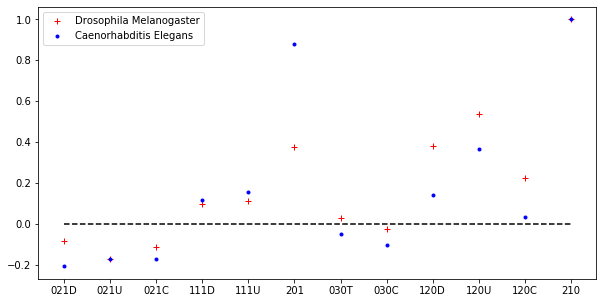

In [320]:
plt.figure(figsize=(10,5))

#plt.plot(list(range(1,len(std_zscores)+1)), std_zscores, 'r+')
res = [(score) for score in std_zscores]
normres = [item/max(res) for item in res]
plt.plot(keys, normres , 'r+', label='Drosophila Melanogaster')
C_res = [(score) for score in C_std_zscores]
C_normres = [item/max(C_res) for item in C_res]
plt.plot(keys, C_normres, 'b.', label='Caenorhabditis Elegans')
plt.hlines(0, 0, 11, linestyle='dashed')
plt.vlines(blocks, -.2, 1)
plt.legend()
plt.savefig('/Users/chris/Desktop/fruitfly/motifs_subset.pdf')
plt.show()

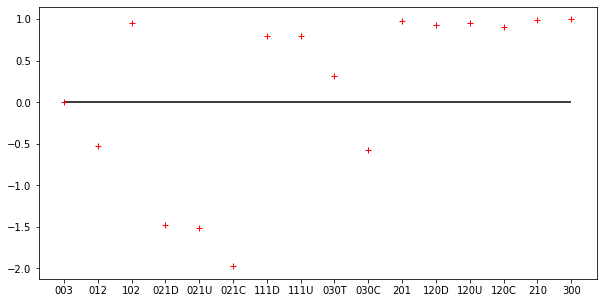

In [121]:
plt.figure(figsize=(10,5))
plt.plot(list(roi_census.keys()), [round((roi_census[key] - int(mean([rand_rois[i][key] for i in range(3)])))/roi_census[key], 3) for key in roi_census.keys()], 'r+')
plt.hlines(0, 0, 15)
plt.show()

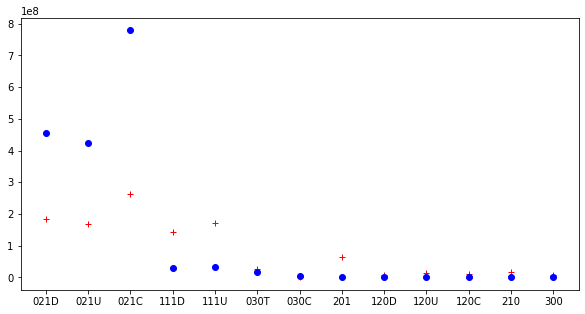

In [95]:
plt.figure(figsize=(10,5))
plt.plot(list(roi_census.keys())[3:], list(roi_census.values())[3:], 'r+')
plt.plot(list(roi_census.keys())[3:], [mean([rand_rois[i][key] for i in range(3)]) for key in roi_census.keys()][3:], 'bo')
plt.show()